In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

petrol = pd.read_csv('petrol_consumption.csv')

petrol.columns = ['tax',
                  'income',
                  'highways',
                  'license',
                  'consumption']
petrol.head()

,tax,income,highways,license,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


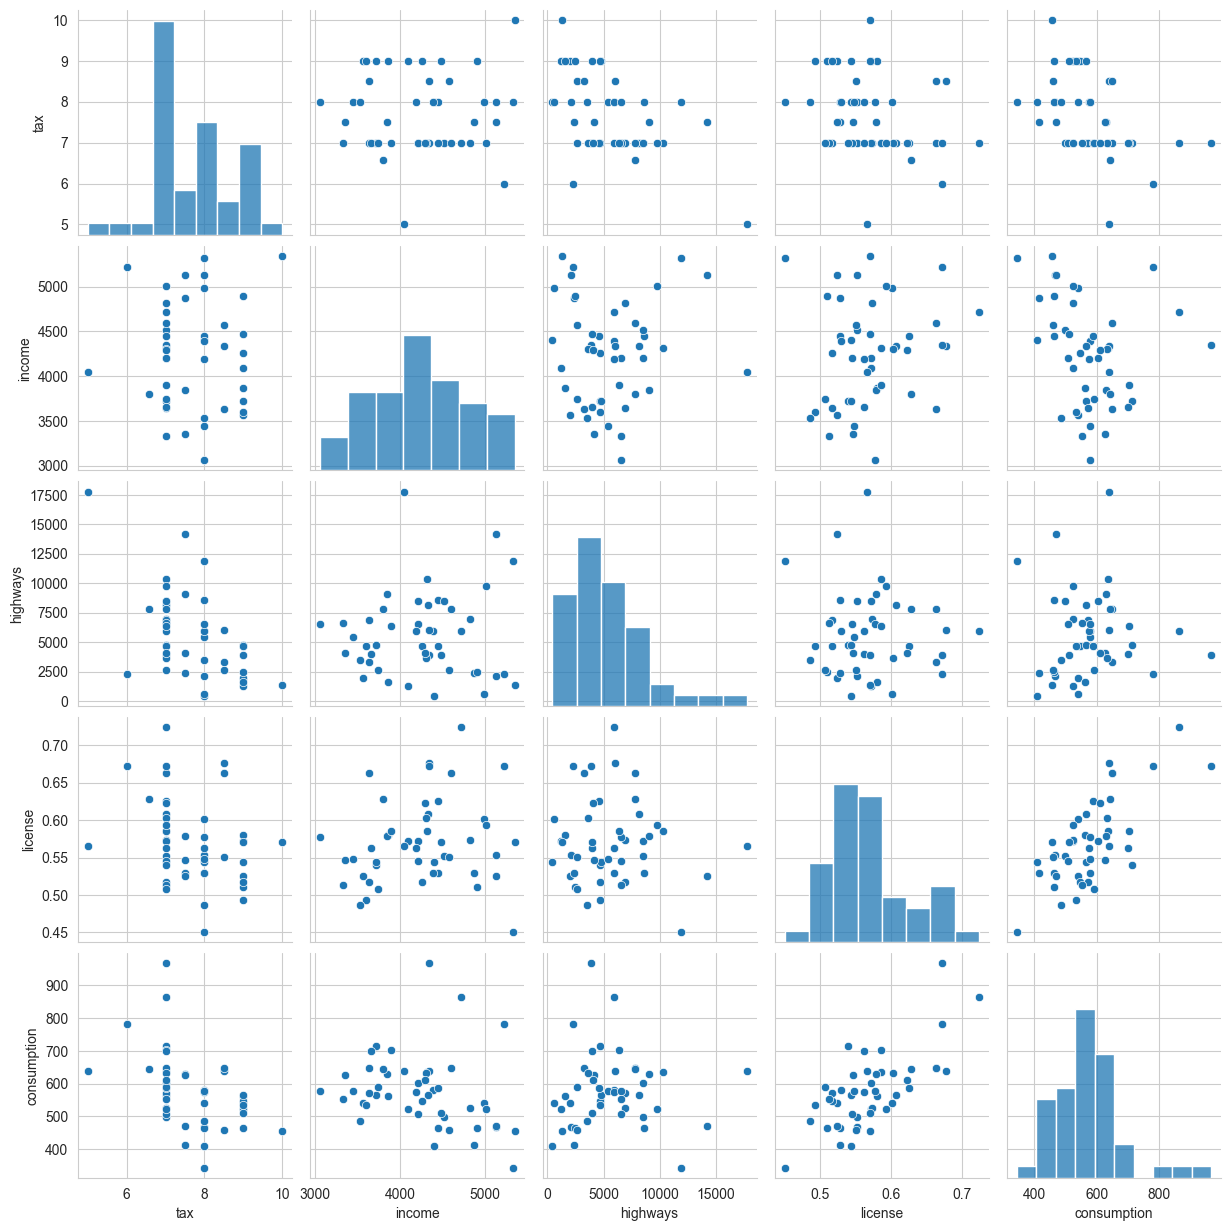

In [10]:
sb.pairplot(petrol)

In [11]:
corr = petrol.corr()
corr

,tax,income,highways,license,consumption
tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
income,0.012665,1.000000,0.050163,0.157070,-0.244862
highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
license,-0.288037,0.157070,-0.064129,1.000000,0.698965
consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [47]:
p_data = petrol[['tax', 'income','highways', 'license']].values
p_target = petrol[['consumption']].values
p_data_names = ['tax', 'income', 'highways', 'license']

X = scale(p_data)
y = p_target

In [48]:
m_v = X == np.NAN
X[m_v == True]

array([], dtype=float64)

In [49]:
LinReg = LinearRegression()
LinReg.fit(X,y)

LinearRegression()

In [50]:
print(LinReg.score(X, y))

0.6786867115698207


In [51]:
print('beta_0', LinReg.intercept_)
print('beta_n', LinReg.coef_)

beta_0 [576.77083333]
beta_n [[-32.7310515  -37.79691223  -8.3813148   73.3569154 ]]


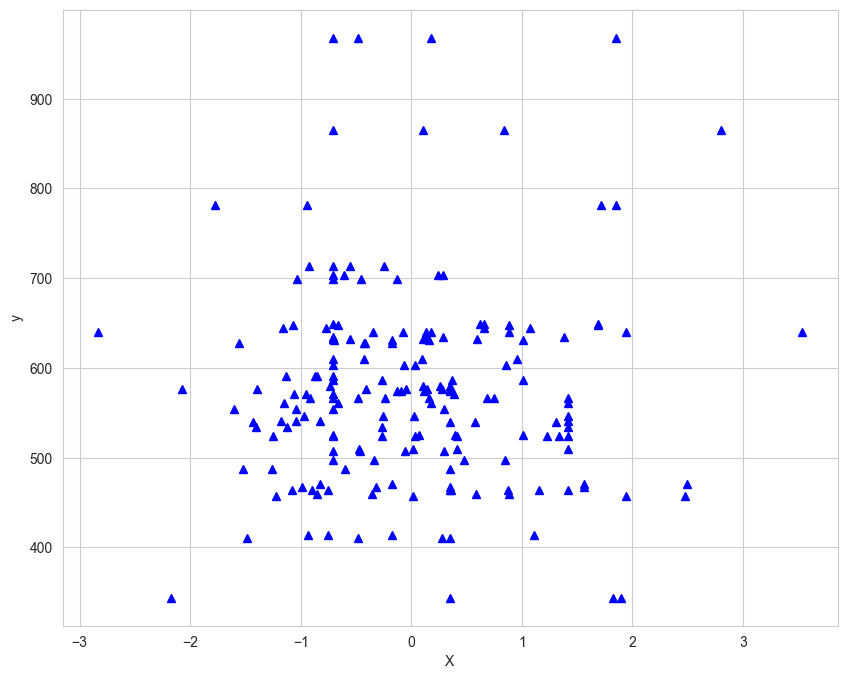

In [52]:
plt.plot(X, y, 'b^')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [55]:
y_pred = LinReg.predict(X)


In [54]:
print(LinReg.score(X, y_pred))

1.0


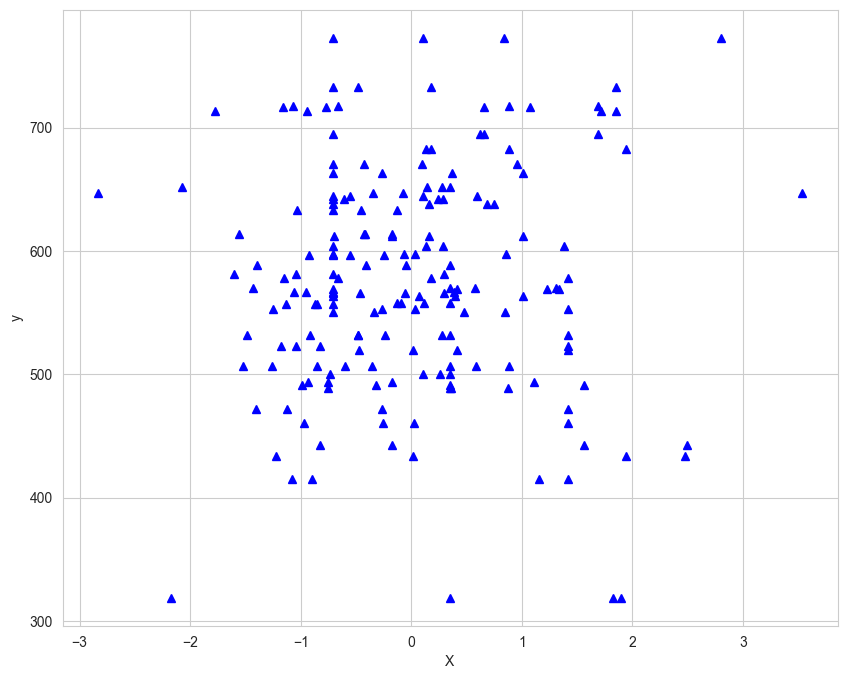

In [56]:
plt.plot(X, y_pred, 'b^')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [57]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

In [58]:
print(f'Середня абсолютна похибка (Mean Absolute Error (MAE)): {mae: .2f}')
print(f'Середня квадратична похибка (Mean Squared Error (MSE)): {mse: .2f}')
print(f'Корінь середньої квадратичної похибки (Root Mean Squared Error (RMSE)): {rmse: .2f}')

Середня абсолютна похибка (Mean Absolute Error (MAE)):  48.78
Середня квадратична похибка (Mean Squared Error (MSE)):  3938.54
Корінь середньої квадратичної похибки (Root Mean Squared Error (RMSE)):  62.76


Модель не є надійною